In [441]:
# Import the required libraries and dependencies
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import sqlalchemy

# Add viz libs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import hvplot.pandas
import altair as alt 
from bokeh.plotting import figure, show
import folium
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image
from plotnine import ggplot, aes, geom_line

## Clean data

In [442]:
# Force clean vars
force_clean_large_kickstarter = True
force_clean_small_kickstarter = True
force_clean_indiegogo = True

# Clean large kickstarter
my_kickstarter_large_file = Path('./Resources/kickstarter_data_clean/ks-projects-large.csv')
if not my_kickstarter_large_file.is_file() or force_clean_large_kickstarter:
    %run ./Resources/Utils/clean_kickstarter_large.ipynb

# Clean small kickstarter
my_kickstarter_small_file = Path('./Resources/kickstarter_data_clean/ks-projects-small.csv')
if not my_kickstarter_small_file.is_file() or force_clean_small_kickstarter:
    %run ./Resources/Utils/clean_kickstarter_small.ipynb

# Clean indiegogo kickstarter
my_indiegogo_file = Path('./Resources/indiegogo_data_clean/indiegogo-projects.csv')
if not my_indiegogo_file.is_file() or force_clean_indiegogo:
    %run ./Resources/Utils/clean_indiegogo.ipynb

## Enable Mapbox API access token

In [443]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
mapbox_api_access_token = os.getenv('MAPBOX_API_ACCESS_TOKEN')

# Confirm the availability of your Mapbox API access token by checking its type
display(type(mapbox_api_access_token))

# Set your Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

str

## Read kickstarter large

In [444]:
# Import small kickstarter most backed dataset
kickstarter_large_clean_df = pd.read_csv(
    Path('./Resources/kickstarter_data_clean/ks-projects-large.csv')
)

# Fix dates
kickstarter_large_clean_df['launched'] = pd.to_datetime(kickstarter_large_clean_df['launched'])
kickstarter_large_clean_df['deadline'] = pd.to_datetime(kickstarter_large_clean_df['deadline'])

# View head
kickstarter_large_clean_df = kickstarter_large_clean_df.sort_values('launched')
display(kickstarter_large_clean_df.head(2))
display(kickstarter_large_clean_df.tail(2))

,ID,name,main_category,category,currency,usd_goal_real,usd_pledged_real,deadline,launched,state,funded_percent,duration,daily_goal,daily_pledged,country,full_country_names,lat,long,avg_backer_per_day,pledged_per_person
12072,1100882558,Get Among Criminals Up and Touring Green This ...,Music,Music,USD,3000.0,100.0,2010-06-04,2010-04-21 00:22:04,0,0.0333,43,69.77,2.33,US,United States,37.09024,-95.712891,0.09,25.00
118172,2002086943,Missed Connections Live,Film & Video,Webseries,USD,8000.0,8215.0,2010-06-20,2010-04-21 00:34:33,1,1.0269,59,135.59,139.24,US,United States,37.09024,-95.712891,2.07,67.34


,ID,name,main_category,category,currency,usd_goal_real,usd_pledged_real,deadline,launched,state,funded_percent,duration,daily_goal,daily_pledged,country,full_country_names,lat,long,avg_backer_per_day,pledged_per_person
26478,1223058036,The Cowboy and The Spaceman: Android Collective+,Games,Tabletop Games,GBP,271.03,544.77,2017-12-31,2017-12-26 13:00:24,1,2.01,4,67.76,136.19,GB,United Kingdom,55.378051,-3.435973,6.25,21.79
67185,156799983,Kill Them All!,Games,Tabletop Games,USD,250.00,265.00,2017-12-30,2017-12-28 01:48:58,1,1.06,1,250.00,265.00,US,United States,37.090240,-95.712891,7.00,37.86


## Read kickstarter small

In [445]:
# Import small kickstarter most backed dataset
kickstarter_small_clean_df = pd.read_csv(
    Path('./Resources/kickstarter_data_clean/ks-projects-small.csv')
)

# View head
kickstarter_small_clean_df.head(2)

,ID,name,main_category,currency,usd_goal_real,usd_pledged_real,location,backers,num.backers.tier,pledge.tier
0,0,Exploding Kittens,Tabletop Games,USD,10000.0,8782571.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]"
1,1,Fidget Cube: A Vinyl Desk Toy,Product Design,USD,15000.0,6465690.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0..."


## Read indiegogo

In [446]:
# Import indiegogo dataset
indiegogo_clean_df = pd.read_csv(
    Path('./Resources/indiegogo_data_clean/indiegogo-projects.csv')
)

# Fix dates
indiegogo_clean_df['launched'] = pd.to_datetime(indiegogo_clean_df['launched'])
indiegogo_clean_df['deadline'] = pd.to_datetime(indiegogo_clean_df['deadline'])

# View head
indiegogo_clean_df = indiegogo_clean_df.sort_values('launched')
display(indiegogo_clean_df.head(2))
display(indiegogo_clean_df.tail(2))


,ID,name,main_category,category,currency,usd_goal_real,usd_pledged_real,deadline,launched,state,funded_percent,duration,daily_goal,daily_pledged,country,full_country_names,lat,long
0,3936,Join the Electric Revolution!!!,Technology,Transportation,USD,5000.0,840.0,2010-05-12 23:59:00,2010-04-21 22:38:42,0,0.1680,21,238.10,40.00,US,United States,37.09024,-95.712891
1,5109,Relief Trip to Haiti,Journalism,Human Rights,USD,1200.0,250.0,2010-07-02 23:59:00,2010-06-10 17:47:35,0,0.2083,22,54.55,11.36,US,United States,37.09024,-95.712891


,ID,name,main_category,category,currency,usd_goal_real,usd_pledged_real,deadline,launched,state,funded_percent,duration,daily_goal,daily_pledged,country,full_country_names,lat,long
9307,2305069,Clarity Marketing: The Book,Journalism,Writing & Publishing,USD,12000.0,6706.0,2018-01-11 23:59:59,2017-12-28 07:10:13,0,0.5588,14,857.14,479.00,US,United States,37.09024,-95.712891
9308,2288408,Change Makers,Photography,Photography,USD,15000.0,175.0,2018-02-26 23:59:59,2017-12-28 17:38:27,0,0.0117,60,250.00,2.92,US,United States,37.09024,-95.712891


## Add SQL database and simple functions to load and access tables in that database

In [447]:
# Establishes Database Connection with a temporary SQL db (we can update to give it a name later)
database_connection_string = "sqlite:///"

engine = sqlalchemy.create_engine(database_connection_string)

# Function to load table into DB
# data is the dataframe we want to save, 
# table name is the name of the new table (as a string value), 
# and engine is the engine input established earlier
def new_table(data, table_name):
    data.to_sql(f"{table_name}", engine, index=True, if_exists="replace")


# Lets us load the table of our choice from the database, just set the function equal to a new dataframe variable and run 
# must set the table name as a string value
def load_full_table(table_name):
    new_df = pd.read_sql_table(f"{table_name}", con=engine )
    return new_df

new_table(kickstarter_large_clean_df, "kickstarter_large")
new_table(kickstarter_small_clean_df, "kickstarter_small")
new_table(indiegogo_clean_df, "indie_gogo")


## Add SQL query to access main_category and mean of duration of projects for Kickstarter and Indiegogo.

In [448]:
# Create a SQL query to get the main_category and duration of the Kickstarter Large dataframe.
query_ks = """
SELECT main_category, duration
FROM kickstarter_large
"""
query_indiegogo = """
SELECT main_category, duration
FROM indie_gogo
"""

# This will let us read the query we applied earlier to create a dataframe.
ks_large_duration_dataframe = pd.read_sql_query(
    query_ks, 
    con= engine)
display(ks_large_duration_dataframe)

indiegogo_duration_dataframe = pd.read_sql_query(
    query_indiegogo, 
    con= engine)
display(indiegogo_duration_dataframe)

,main_category,duration
0,Music,43
1,Film & Video,59
2,Film & Video,9
3,Film & Video,40
4,Theater,70
...,...,...
227494,Art,6
227495,Games,1
227496,Games,2
227497,Games,4


,main_category,duration
0,Technology,21
1,Journalism,22
2,Journalism,22
3,Photography,30
4,Journalism,120
...,...,...
9304,Food,40
9305,Technology,34
9306,Technology,7
9307,Journalism,14


In [449]:
# Create a SQL query to get the main_category and 
# duration of the Kickstarter Large dataframe and 
# group them by main_category and get its average duration days.
query="""SELECT
   main_category, AVG(duration) AS average_duration_days
FROM
  kickstarter_large
GROUP BY
  main_category
ORDER BY 
    AVG(duration) DESC,
    main_category DESC;
"""
# This will let us read the query we applied earlier to create a dataframe.
ks_large_groupby_maincategory_df = pd.read_sql_query(
    query, 
    con= engine)
ks_large_groupby_maincategory_df


,main_category,average_duration_days
0,Technology,34.203560
1,Music,33.978123
2,Film & Video,33.656602
3,Journalism,32.861840
4,Food,32.844168
5,Photography,32.257829
6,Theater,31.995545
7,Games,31.160263
8,Art,31.062123


In [450]:
# This will create a bar plot to visualize the average duration of 
# the projects per main category in Kickstarter.

ks_lrg_duration_hvplot = ks_large_groupby_maincategory_df.hvplot(kind='bar',
                                            x='main_category',
                                            ylim=(30.0,35.0),
                                            rot=60,
                                            title="Kickstarter's Average Duration Days of Each Main Category",
                                            hover_color= 'orange',
                                            color = 'green'
                                            )
ks_lrg_duration_hvplot

:Bars   [main_category]   (average_duration_days)

In [451]:
# Create a SQL query to get the main_category and 
# duration of the Indiegogo  dataframe and 
# group them by main_category and get its average duration days.
query="""SELECT
   main_category, AVG(duration) AS average_duration_days
FROM
  indie_gogo
GROUP BY
  main_category
ORDER BY 
    AVG(duration) DESC,
    main_category DESC;
"""
# This will let us read the query we applied earlier to create a dataframe.
indiegogo_groupby_maincategory_df = pd.read_sql_query(
    query, 
    con= engine)
indiegogo_groupby_maincategory_df

,main_category,average_duration_days
0,Food,44.834425
1,Music,44.610644
2,Art,43.418966
3,Theater,43.300000
4,Film & Video,43.038050
5,Photography,42.939837
6,Journalism,42.801370
7,Technology,42.169352
8,Games,40.861176


In [452]:
# This will create a bar plot to visualize the average duration of the
# projects per main category in Indiegogo.

indiegogo_duration_hvplot = indiegogo_groupby_maincategory_df.hvplot(kind='bar',
                                            x='main_category',
                                            ylim=(20,46.0),
                                            rot=60,
                                            title="Indiegogo's Average Duration Days of Each Main Category",
                                            hover_color= 'orange',
                                            color = 'magenta'
                                            )
indiegogo_duration_hvplot

:Bars   [main_category]   (average_duration_days)

## Add SQL query to get the countries of Kickstarter and Indiegogo and get total the number of projects per country

In [453]:
# Create a SQL query to get the total number of projects in Kickstarter Large dataframe per country.
query_ks_country = """
SELECT full_country_names AS Country, COUNT (*) AS Total_number_of_projects, lat, long 
FROM kickstarter_large
GROUP BY full_country_names
ORDER BY
    total_number_of_projects DESC;
"""

# This will let us read the query we applied earlier to create a dataframe.
ks_country_total_df = pd.read_sql_query(
    query_ks_country, 
    con= engine)
ks_country_total_df

,Country,Total_number_of_projects,lat,long
0,United States,180303,37.090240,-95.712891
1,United Kingdom,20374,55.378051,-3.435973
2,Canada,8055,56.130366,-106.346771
3,Australia,4169,-25.274398,133.775136
4,Germany,2367,51.165691,10.451526
5,France,1757,46.227638,2.213749
6,Netherlands,1638,52.132633,5.291266
7,Italy,1587,41.871940,12.567380
8,Spain,1319,40.463667,-3.749220
9,Mexico,1045,23.634501,-102.552784


In [454]:
# Create a SQL query to get the total number of projects in Kickstarter Large dataframe per country.
query_indiegogo_country = """
SELECT full_country_names AS Country, COUNT (*) AS Total_number_of_projects, lat, long 
FROM indie_gogo
GROUP BY full_country_names
ORDER BY
    total_number_of_projects DESC;
"""

# This will let us read the query we applied earlier to create a dataframe.
indiegogo_country_total_df = pd.read_sql_query(
    query_indiegogo_country, 
    con= engine)
indiegogo_country_total_df

,Country,Total_number_of_projects,lat,long
0,United States,7456,37.090240,-95.712891
1,Luxembourg,686,49.815273,6.129583
2,United Kingdom,679,55.378051,-3.435973
3,Canada,384,56.130366,-106.346771
4,Australia,104,-25.274398,133.775136


## Create scatter mapbox plot for Kickstarter and Indiegogo countries and their respective total number of projects.

In [455]:
# This will create a scatter mapbox plot for Kickstarter and  their respective longitude and latitude plotted in with total number of projects.
ks_mapbox_plot = px.scatter_mapbox(
    ks_country_total_df,
    title='Kickstarter Total Projects per Country',
    lat='lat',
    lon='long',
    size='Total_number_of_projects',
    hover_name='Country',
    size_max=60,
    zoom= 11, center = {"lat": 37.090240, "lon": -95.712891},
    color_discrete_sequence=["green"],
    height=500,
    width=900
   
)
ks_mapbox_plot

In [456]:
# This will create a scatter mapbox plot for Indiegogo and  their respective longitude and latitude plotted in with total number of projects.
indiegogo_mapbox_plot = px.scatter_mapbox(
    indiegogo_country_total_df,
    title='Indiegogo Total Projects per Country',
    lat='lat',
    lon='long',
    size='Total_number_of_projects',
    hover_name='Country',
    size_max=60,
    zoom= 11, center = {"lat": 37.090240, "lon": -95.712891},
    color_discrete_sequence=["fuchsia"],
    height=500,
    width=900
   
)
indiegogo_mapbox_plot

## SQL query to get the main_category and percent of successful vs failed projects for Kickstarter

In [457]:
query = """
SELECT main_category, COUNT (*) AS Total_number_of_projects, AVG(funded_percent) AS average_fund_percentage
FROM kickstarter_large
GROUP BY main_category
ORDER BY
    total_number_of_projects DESC;
"""

ks_main_category_total = pd.read_sql_query(
    query, 
    con= engine)
ks_main_category_total

,main_category,Total_number_of_projects,average_fund_percentage
0,Film & Video,55705,1.635011
1,Music,45253,8.931210
2,Games,28447,8.318282
3,Technology,26970,3.057622
4,Art,25369,2.313705
5,Food,21998,0.916486
6,Theater,10102,1.063231
7,Photography,9580,0.633917
8,Journalism,4075,0.563299


In [458]:
# Created a for loop statement to get the percent success and percent failed of each main_category for Kickstarter and added it on the dataframe.

category_list = ks_main_category_total["main_category"]
list_of_percent_success = []

i=0

for category in category_list:
    query =  f"""
    SELECT main_category, funded_percent, usd_pledged_real, usd_goal_real
    FROM kickstarter_large
    WHERE main_category == "{category}"
    AND usd_pledged_real >= usd_goal_real
    ORDER BY funded_percent DESC
    """

    ks_main_category_success = pd.read_sql_query(
        query, 
        con= engine)
    percent_success_main_category = ks_main_category_success["main_category"].count() / ks_main_category_total.loc[i, 'Total_number_of_projects']
    
    list_of_percent_success.append(percent_success_main_category)
    i= i+1
    
ks_main_category_total["percent_success"] = list_of_percent_success
ks_main_category_total["percent_fail"] = 1 - ks_main_category_total["percent_success"]
ks_main_category_total


,main_category,Total_number_of_projects,average_fund_percentage,percent_success,percent_fail
0,Film & Video,55705,1.635011,0.417198,0.582802
1,Music,45253,8.931210,0.524739,0.475261
2,Games,28447,8.318282,0.438675,0.561325
3,Technology,26970,3.057622,0.237301,0.762699
4,Art,25369,2.313705,0.448027,0.551973
5,Food,21998,0.916486,0.274934,0.725066
6,Theater,10102,1.063231,0.638784,0.361216
7,Photography,9580,0.633917,0.338727,0.661273
8,Journalism,4075,0.563299,0.238773,0.761227


## SQL query to get the main_category and percent of successful vs failed projects for Indiegogo

In [459]:
query = """
SELECT main_category, COUNT (*) AS Total_number_of_projects, AVG(funded_percent) AS average_fund_percentage
FROM indie_gogo
GROUP BY main_category
ORDER BY
    total_number_of_projects DESC;
"""

indiegogo_main_category_total = pd.read_sql_query(
    query, 
    con= engine)
indiegogo_main_category_total

,main_category,Total_number_of_projects,average_fund_percentage
0,Technology,2669,1.467151
1,Journalism,1168,0.361738
2,Art,1160,0.307663
3,Food,1069,0.460620
4,Games,850,0.718670
5,Film & Video,841,1.109117
6,Photography,615,0.504233
7,Theater,580,0.298527
8,Music,357,0.308475


In [460]:
# Created a for loop statement to get the percent success and percent failed of each main_category for Kickstarter and added it on the dataframe.

category_list = indiegogo_main_category_total["main_category"]
list_of_percent_success = []

i=0

for category in category_list:
    query =  f"""
    SELECT main_category, funded_percent, usd_pledged_real, usd_goal_real
    FROM indie_gogo
    WHERE main_category == "{category}"
    AND usd_pledged_real >= usd_goal_real
    ORDER BY funded_percent DESC
    """

    indiegogo_main_category_success = pd.read_sql_query(
        query, 
        con= engine)
    percent_success_main_category = indiegogo_main_category_success["main_category"].count() / indiegogo_main_category_total.loc[i, 'Total_number_of_projects']
    
    list_of_percent_success.append(percent_success_main_category)
    i= i+1
    

indiegogo_main_category_total["percent_success"] = list_of_percent_success

indiegogo_main_category_total["percent_fail"] = 1 - indiegogo_main_category_total["percent_success"]

display(indiegogo_main_category_total)

,main_category,Total_number_of_projects,average_fund_percentage,percent_success,percent_fail
0,Technology,2669,1.467151,0.193706,0.806294
1,Journalism,1168,0.361738,0.117295,0.882705
2,Art,1160,0.307663,0.057759,0.942241
3,Food,1069,0.460620,0.054256,0.945744
4,Games,850,0.718670,0.135294,0.864706
5,Film & Video,841,1.109117,0.167658,0.832342
6,Photography,615,0.504233,0.156098,0.843902
7,Theater,580,0.298527,0.000000,1.000000
8,Music,357,0.308475,0.005602,0.994398


## Plot and analyze success vs fail for Kickstarter.

In [461]:
# Create an hvplot bar to show the success and failed projects of each main category of Kickstarter.
ks_main_category_total.hvplot.bar(stacked= True,
                                  y=['percent_fail', 'percent_success'],
                                  x= 'main_category',
                                  rot= 60,
                                 title='Kickstarter Main Category Success vs Failed Project',
                                  cmap=['pink', 'green']
                                 )

:Bars   [main_category,Variable]   (value)

## Plot and analyze success vs fail for Indiegogo.

In [462]:
# Create an hvplot bar to show the success and failed projects of each main category of Indiegogo.
indiegogo_main_category_total.hvplot.bar(stacked= True,
                                  y=['percent_fail', 'percent_success'],
                                  x= 'main_category',
                                  rot= 60,
                                 title='Indiegogo Main Category Success vs Failed Project',
                                  cmap=['pink', 'green']
                                 )

:Bars   [main_category,Variable]   (value)

## General Summary Stats for Indiegogo

In [463]:
# Generate summary stats for indiegogo
indiegog_data_df = load_full_table('indie_gogo')
indiegogo_summary_df = indiegog_data_df.drop(columns=['ID', 'name', 'index', 'deadline', 'launched', 'state', 'lat', 'long']).describe()

# View head
indiegogo_summary_df

,usd_goal_real,usd_pledged_real,funded_percent,duration,daily_goal,daily_pledged
count,9309.000000,9.309000e+03,9309.000000,9309.000000,9309.00,9309.00
mean,26653.296548,2.334331e+04,0.786834,42.884413,inf,inf
std,50055.500815,1.680333e+05,4.581792,20.841792,NaN,NaN
min,375.037800,1.000000e+00,0.000000,0.000000,0.94,0.02
25%,3200.000000,1.955490e+02,0.020700,30.000000,83.33,4.58
50%,10000.000000,7.220000e+02,0.123900,45.000000,234.38,18.33
75%,25000.000000,2.753383e+03,0.446600,60.000000,681.82,71.96
max,500000.000000,6.051571e+06,207.054000,720.000000,inf,inf


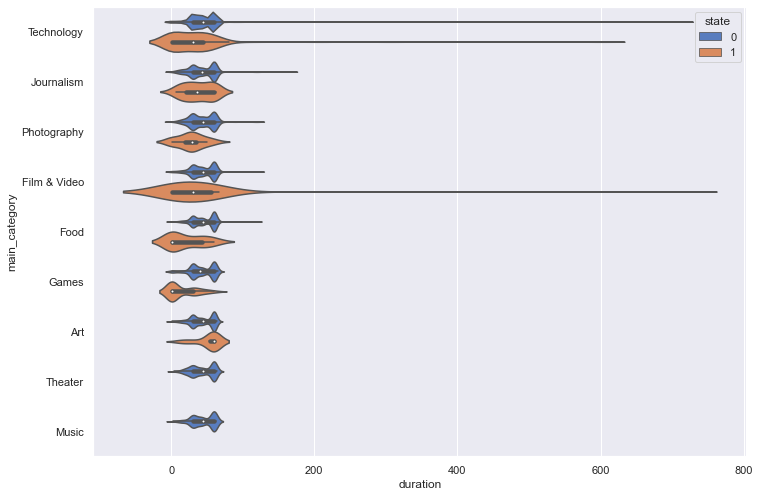

In [464]:
# Violin plot of duration by state
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(
    x="duration",
    y="main_category",
    hue="state",
    data=indiegog_data_df,
    scale="width",
    palette="muted"
    )

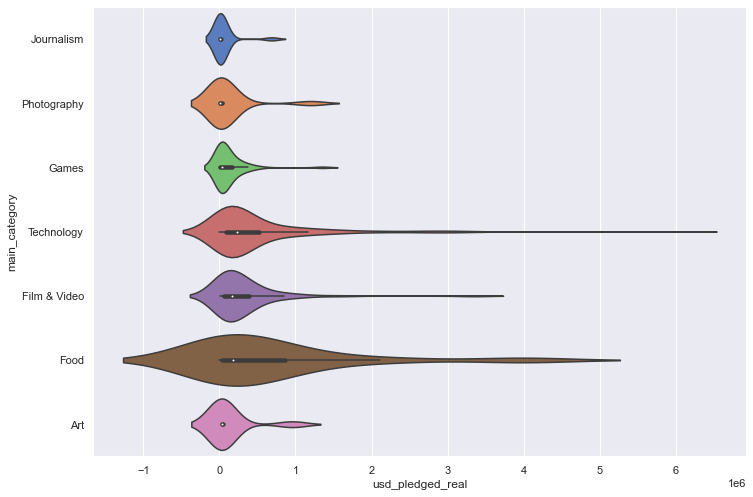

In [465]:
# Violin plot of pledged with success true
indiegogo_clean_success_df = indiegog_data_df[indiegog_data_df['state'] == 1]
ax = sns.violinplot(
    x="usd_pledged_real",
    y="main_category",
    data=indiegogo_clean_success_df,
    scale="width",
    palette="muted"
    )

## General Summary Stats for Kickstarter

In [466]:
# Generate summary stats for indiegogo
kickstarter_summary_df_test = load_full_table('kickstarter_large').drop(columns=['ID', 'name', 'index', 'deadline', 'launched', 'state', 'lat', 'long', 'avg_backer_per_day', 'pledged_per_person']).describe()

# View head
kickstarter_summary_df_test

,usd_goal_real,usd_pledged_real,funded_percent,duration,daily_goal,daily_pledged
count,2.274990e+05,2.274990e+05,227499.000000,227499.000000,227499.00,227475.000
mean,5.019878e+04,9.799910e+03,4.010140,32.958479,inf,inf
std,1.262009e+06,8.555011e+04,334.397301,12.800626,NaN,NaN
min,1.500000e-01,0.000000e+00,0.000000,0.000000,0.00,0.000
25%,2.000000e+03,4.625000e+01,0.006400,29.000000,68.97,1.380
50%,5.311080e+03,8.200000e+02,0.205300,29.000000,175.21,27.590
75%,1.594354e+04,4.733000e+03,1.087500,36.000000,517.24,159.495
max,1.663614e+08,1.239314e+07,104277.890000,91.000000,inf,inf


## Create a WordCloud to show the main categories for Kickstarter

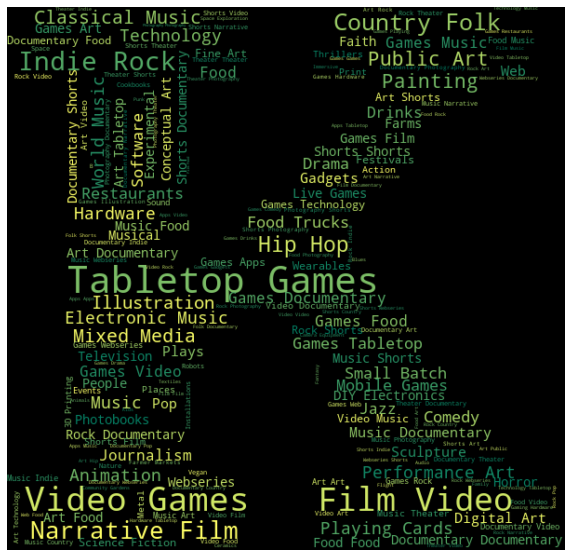

In [468]:
# Create a WordCloud to show the main categories for Kickstarter.

# Create a list of word
ks_cat = kickstarter_large_clean_df['category']
ks_string = " ".join(ks_cat)
mask = np.array(Image.open('./Resources/Images/K.png'))

# Create the wordcloud object
wordcloud = WordCloud(width=50, height=50, margin=0, max_words=200, max_font_size= 100, colormap='summer', random_state= 10, mask=mask).generate(ks_string)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


## Create a WordCloud to show the main categories for Indiegogo

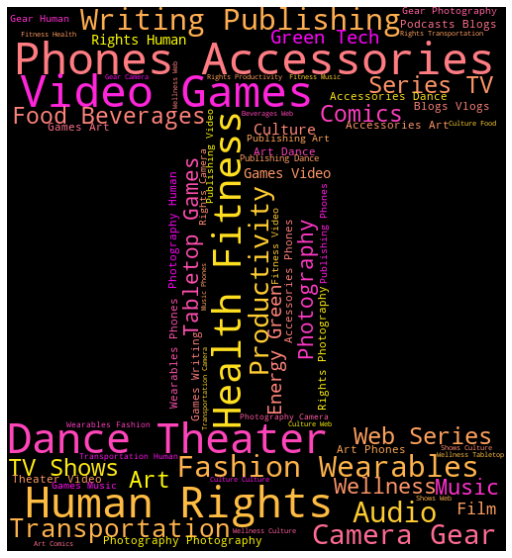

In [469]:
# Create a WordCloud to show the main categories for Indiegogo.

# Create a list of word
indie_cat = indiegogo_clean_df['category']
indie_string = " ".join(indie_cat)

mask = np.array(Image.open('./Resources/Images/I.png'))

# Create the wordcloud object
wordcloud = WordCloud(width=100, height=100, margin=0, max_words=200, max_font_size=100, colormap='spring', random_state=6, mask=mask).generate(indie_string)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

